import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv("sets.csv.zip")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14936 entries, 0 to 14935
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Set_ID            14936 non-null  object 
 1   Name              14936 non-null  object 
 2   Year              14936 non-null  int64  
 3   Theme             14936 non-null  object 
 4   Theme_Group       14915 non-null  object 
 5   Subtheme          11495 non-null  object 
 6   Category          14936 non-null  object 
 7   Packaging         14936 non-null  object 
 8   Num_Instructions  14936 non-null  int64  
 9   Availability      14936 non-null  object 
 10  Pieces            13133 non-null  float64
 11  Minifigures       7686 non-null   float64
 12  Owned             14771 non-null  float64
 13  Rating            14936 non-null  float64
 14  USD_MSRP          5837 non-null   float64
 15  Total_Quantity    12276 non-null  float64
 16  Current_Price     5442 non-null   float6

In [4]:
df.describe()

,Year,Num_Instructions,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
count,14936.000000,14936.000000,13133.000000,7686.000000,14771.000000,14936.000000,5837.000000,12276.000000,5442.000000
mean,2006.750736,1.196036,237.935734,2.709862,2045.236951,1.826627,39.967050,4.708618,90.164663
std,11.524612,2.087763,473.090631,2.955427,2972.330218,1.950909,55.006213,20.995961,193.452605
min,1975.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.490000,0.000000,0.050000
25%,2000.000000,0.000000,25.000000,1.000000,90.000000,0.000000,9.990000,0.000000,15.000000
50%,2009.000000,0.000000,81.000000,2.000000,744.000000,0.000000,19.990000,0.000000,36.000000
75%,2016.000000,2.000000,262.000000,3.000000,2828.500000,3.900000,49.990000,3.000000,92.000000
max,2023.000000,48.000000,11695.000000,80.000000,29429.000000,4.900000,849.990000,1063.000000,5499.990000


In [6]:
duplicate_rows=df.duplicated()
print("duplicated rows:",duplicate_rows.sum())

duplicated rows: 0


In [7]:
df=df.dropna()
df

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
5826,7235-1,Police Motorcycle,2005,City,Modern day,Police,Normal,Box,2,Retail,28.0,1.0,13782.0,3.6,3.99,4.0,8.000
5827,7236-1,Police Car,2005,City,Modern day,Police,Normal,Box,2,Retail,59.0,1.0,10671.0,3.5,5.99,3.0,11.000
5829,7238-1,Fire Helicopter,2005,City,Modern day,Fire,Normal,Box,2,Retail,75.0,1.0,4632.0,3.5,9.99,2.0,24.990
5830,7239-1,Fire Truck,2005,City,Modern day,Fire,Normal,Box,4,Retail,214.0,2.0,13471.0,4.0,22.99,4.0,25.200
5832,7241-1,Fire Car,2005,City,Modern day,Fire,Normal,Box,2,Retail,46.0,1.0,8934.0,3.5,3.99,1.0,8.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,76917-1,2 Fast 2 Furious Nissan Skyline GT-R (R34),2023,Speed Champions,Licensed,Nissan,Normal,Box,2,Retail,319.0,1.0,4755.0,4.4,24.99,43.0,14.640
14893,77012-1,Fighter Plane Chase,2023,Indiana Jones,Licensed,Last Crusade,Normal,Box,2,Retail,387.0,3.0,1882.0,4.7,34.99,2.0,27.890
14894,77013-1,Escape from the Lost Tomb,2023,Indiana Jones,Licensed,Raiders of the Lost Ark,Normal,Box,2,Retail,600.0,4.0,1721.0,4.5,39.99,4.0,33.100
14896,77015-1,Temple of the Golden Idol,2023,Indiana Jones,Licensed,Raiders of the Lost Ark,Normal,Box,2,Retail,1545.0,5.0,1415.0,4.8,149.99,1.0,170.147


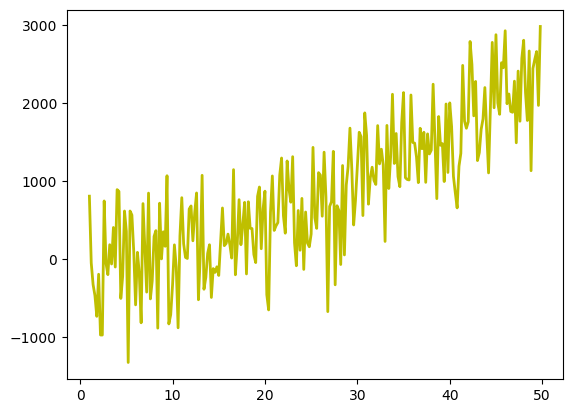

In [23]:
import matplotlib.pyplot as plt
data, tmp = 0, 500
x = np.arange(1, 50, 0.2)  # x axis
z = np.random.normal(data, tmp, len(x))  # noise
y = x ** 2 + z  
plt.plot(x, y, linewidth=2, linestyle="-", c="y")

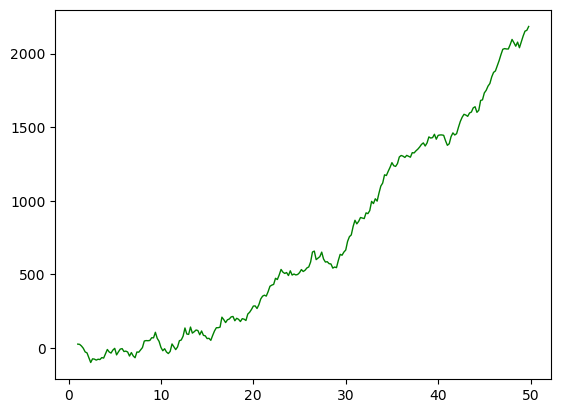

In [34]:
#removing noisy data
from scipy.signal import lfilter
n = 30
b = [1.0 / n] * n
a = 1
cln = lfilter(b,a, y)
plt.plot(x, cln, linewidth=1, linestyle="-", c="g") 

Text(0, 0.5, 'Theme')

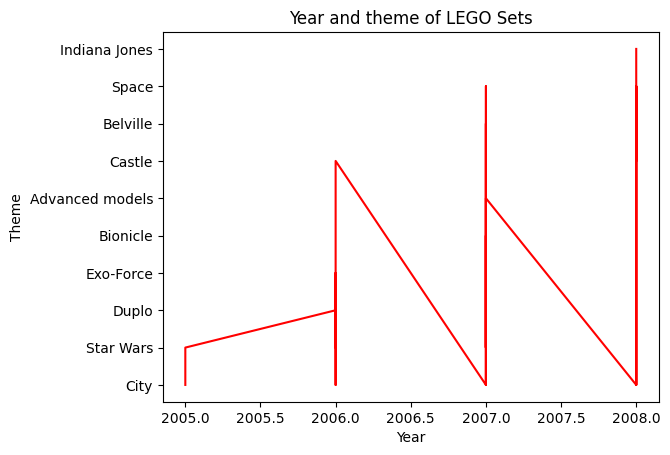

In [51]:
import matplotlib.pyplot as plt
dis = df.head(100)
color = 'Red'
plt.plot(dis['Year'],dis['Theme'],color)
plt.title("Year and theme of LEGO Sets")
plt.xlabel('Year')
plt.ylabel('Theme')



Text(0, 0.5, 'Prices')

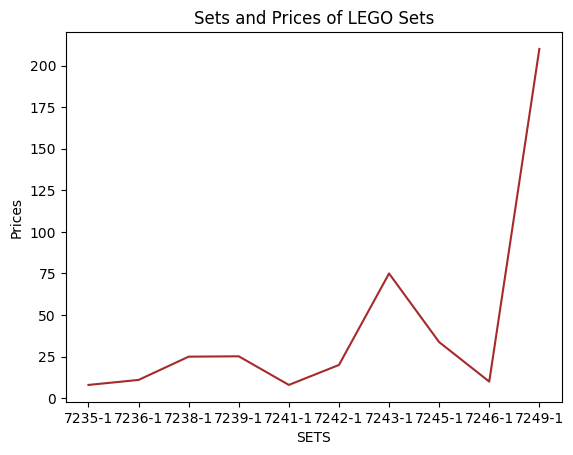

In [61]:
import matplotlib.pyplot as plt
dis = df.head(10)
color = 'Brown'
plt.plot(dis['Set_ID'],dis['Current_Price'],color)
plt.title("Sets and Prices of LEGO Sets")
plt.xlabel('SETS')
plt.ylabel('Prices')